In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output

import math
from scipy import integrate
import scipy.interpolate

In [105]:
class tank_:
    def __init__(self):
        self.a = 2.9 # ширина, м
        self.b = 2.2 # высота, м
        self.type = '100' # тип танковой пушки
        self.n = 15 # скорострельность, 1/м
        self.omega = 1.7 # среднее число попаданий, необходимое для поражения цели
        self.V = 12 # скорость танка, м/с
        self.Ex_x = 1/1300

class test_:
    def __init__(self):
        self.a = 2.2 # ширина, м
        self.b = 3 # высота, м
        self.type = '100' # тип танковой пушки
        self.n = 140 # скорострельность, 1/м
        self.omega = 1.3 # среднее число попаданий, необходимое для поражения цели
        self.V = 14 # скорость танка, м/с
        self.Ex_x = 1/800

class test_ATS_:
    def __init__(self):
        self.a = 1.5 # ширина, м
        self.b = 2 # высота, м
        self.type = '100' # тип танковой пушк
        self.n = {  # скорострельность
            '100': 120,
            '152': 120,
            'ПТРК': ['сам', 'ком'][0]   }
        self.omega = {  # тип танковой пушки
            '100': 1.2,
            '152': 1.1,
            'ПТРК': 1.0
        }
        self.V = 12000 # скорость ПТУР, м/c
        self.Ex_x = {
            '100': 1/800,
            '152': 1/900,
            'ПТРК': 1/800
        }

class ATS_:
    def __init__(self):
        self.a = 1.8 # ширина, м
        self.b = 2 # высота, м
        self.type = ['100', '152', 'ПТРК'] # типы пушек
        self.n = {  # скорострельность
            '100': 14,
            '152': 12,
            'ПТРК': ['сам', 'ком'][0]   }
        self.omega = {  # тип танковой пушки
            '100': 1.5,
            '152': 1.2,
            'ПТРК': 1.3
        }
        self.V = 160 # скорость ПТУР, м/c
        self.Ex_x = {
            '100': 1/1500,
            '152': 1/900,
            'ПТРК': 1/1500
        }

class figth_:
    def __init__(self, tank, ATS):
        self.tank = tank
        self.ATS = ATS

    def refresh(self):
        self.x = 900
        self.t = 0
        self.table = pd.DataFrame({
            't': [],
            'X': [],
            'sigma': [],
            'Ф_b': [],
            'Ф_а': [],
            'W': []     
            })
    
    def get_F(self, x):
        def f(t):
            return math.exp(-t**2/2)
        part_1 = 1/math.sqrt(2*math.pi)
        part_2, err = integrate.quad(f, 0, x)
        return part_1*part_2

    def get_W_tank(self):
         return 4/self.tank.omega*self.F_a*self.F_b
    
    def get_W_ATS(self, type_):
         return 4/self.ATS.omega[type_]*self.F_a*self.F_b
    
    def calculate_tank(self):
        self.refresh()

        while self.x > 0:

            self.sigma = 1.48*self.tank.Ex_x*self.x

            self.F_a = self.get_F(self.ATS.a/(2*self.sigma))
            self.F_b = self.get_F(self.ATS.b/(2*self.sigma))

            self.W = self.get_W_tank()
            
            tmp_df = pd.DataFrame({
                't': [self.t],
                'X':[self.x],
                'sigma': [self.sigma],
                'Ф_b': [self.F_b],
                'Ф_а': [self.F_a],
                'W': [self.W]  })

            self.table = pd.concat([self.table, tmp_df], ignore_index = True)

            self.t += 60/self.tank.n
            self.x -= self.tank.V*60/self.tank.n

        tmp_df = pd.DataFrame({
                't': [self.t],
                'X':[0],
                'sigma': [self.sigma],
                'Ф_b': [self.F_b],
                'Ф_а': [self.F_a],
                'W': [self.W]  })

        self.table = pd.concat([self.table, tmp_df], ignore_index = True)

        return self.table

    def calculate_ATS(self, type_):
        self.refresh()

        while self.x > 0:
            
            self.sigma = 1.48*self.ATS.Ex_x[type_]*self.x

            self.F_a = self.get_F(self.tank.a/(2*self.sigma))
            self.F_b = self.get_F(self.tank.b/(2*self.sigma))

            self.W = self.get_W_ATS(type_)
            
            tmp_df = pd.DataFrame({
                't': [self.t],
                'X':[self.x],
                'sigma': [self.sigma],
                'Ф_b': [self.F_b],
                'Ф_а': [self.F_a],
                'W': [self.W]  })

            self.table = pd.concat([self.table, tmp_df], ignore_index = True)

            self.t += 60/self.ATS.n[type_]
            # print(self.ATS.V*60/self.ATS.n[type_])
            self.x -= self.tank.V*60/self.ATS.n[type_]

        tmp_df = pd.DataFrame({
                't': [self.t],
                'X':[0],
                'sigma': [self.sigma],
                'Ф_b': [self.F_b],
                'Ф_а': [self.F_a],
                'W': [self.W]  })

        self.table = pd.concat([self.table, tmp_df], ignore_index = True)
        
        return self.table

    def calculate_ATS_PRYR(self, type_):
        self.refresh()

        while self.x > 0:
            
            self.sigma = 1.48*self.ATS.Ex_x[type_]*self.x

            self.F_a = self.get_F(self.tank.a/(2*self.sigma))
            self.F_b = self.get_F(self.tank.b/(2*self.sigma))

            self.W = self.get_W_ATS(type_)
            
            tmp_df = pd.DataFrame({
                't': [self.t],
                'X':[self.x],
                'sigma': [self.sigma],
                'Ф_b': [self.F_b],
                'Ф_а': [self.F_a],
                'W': [self.W]  })

            self.table = pd.concat([self.table, tmp_df], ignore_index = True)

            # print(self.ATS.V*60/self.ATS.n[type_])
            self.t += self.x/(self.tank.V+self.ATS.V)
            self.x -= self.tank.V*self.t
            

        tmp_df = pd.DataFrame({
                't': [self.t],
                'X':[0],
                'sigma': [self.sigma],
                'Ф_b': [self.F_b],
                'Ф_а': [self.F_a],
                'W': [self.W]  })

        self.table = pd.concat([self.table, tmp_df], ignore_index = True)
        
        return self.table

    def probab(df_T, df_100, df_152, df_PTYR):
        table = pd.DataFrame({
            't': [],
            'X': [],
            'sigma': [],
            'Ф_b': [],
            'Ф_а': [],
            'W': []     
            })

tank = tank_()
ATS = ATS_()
test_tank = test_()
test_ATS = test_ATS_()
figth = figth_(tank, ATS)

df_tank_100 = figth.calculate_tank()
df_ATS_100 = figth.calculate_ATS('100')
df_ATS_152 = figth.calculate_ATS('152')
df_ATS_PTYR = figth.calculate_ATS_PRYR('ПТРК')

(0.0, 900.0)

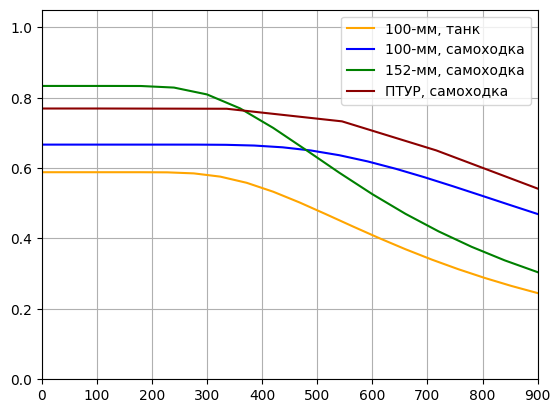

In [106]:
plt.plot(df_tank_100.X, df_tank_100.W, c='orange', label='100-мм, танк')
plt.plot(df_ATS_100.X, df_ATS_100.W, c='blue', label='100-мм, самоходка')
plt.plot(df_ATS_152.X, df_ATS_152.W, c='green', label='152-мм, самоходка')
y_interp = scipy.interpolate.interp1d(df_ATS_PTYR.X, df_ATS_PTYR.W)
plt.plot(df_ATS_PTYR.X, df_ATS_PTYR.W, c='darkred', label='ПТУР, самоходка')
plt.legend()
plt.grid()
plt.ylim(0, 1.05)
plt.xlim(0, 900)

In [110]:
df_ATS_100

,t,X,sigma,Ф_b,Ф_а,W
0,0.000000,900.000000,0.888000,0.392279,0.448753,0.469430
1,4.285714,848.571429,0.837257,0.405546,0.458349,0.495684
2,8.571429,797.142857,0.786514,0.419030,0.467378,0.522254
3,12.857143,745.714286,0.735771,0.432547,0.475622,0.548610
4,17.142857,694.285714,0.685029,0.445838,0.482857,0.574070
5,21.428571,642.857143,0.634286,0.458562,0.488874,0.597810
6,25.714286,591.428571,0.583543,0.470288,0.493519,0.618923
7,30.000000,540.000000,0.532800,0.480518,0.496750,0.636527
8,34.285714,488.571429,0.482057,0.488752,0.498685,0.649955
9,38.571429,437.142857,0.431314,0.494619,0.499613,0.658982


In [114]:
df = pd.concat([df_tank_100, df_ATS_152], ignore_index = True).sort_values('X', key=lambda x: -x)
df

,t,X,sigma,Ф_b,Ф_а,W
0,0.0,900.0,1.024615,0.335462,0.310131,0.244793
20,0.0,900.0,1.480000,0.271333,0.336390,0.304246
1,4.0,852.0,0.969969,0.348720,0.323261,0.265242
21,5.0,840.0,1.381333,0.287080,0.353074,0.337869
2,8.0,804.0,0.915323,0.362696,0.337260,0.287818
22,10.0,780.0,1.282667,0.304440,0.370858,0.376347
3,12.0,756.0,0.860677,0.377357,0.352148,0.312672
23,15.0,720.0,1.184000,0.323569,0.389649,0.420261
4,16.0,708.0,0.806031,0.392632,0.367914,0.339893
24,20.0,660.0,1.085333,0.344593,0.409225,0.470052


In [ ]:
def crit(c_cn, ):
    C_CAY = 10000
    C_snar = {
        '100': 100,
        '152': 300,
        'ПТУР': 600
    }
    N_bk = {
        '100': 40,
        '152': 30,
        'танк': 40
    }
    pass

